A perceptron is a fundamental building block of artificial neural networks and machine learning models. It's a type of artificial neuron or node that was developed by Frank Rosenblatt in 1957. The perceptron is a simple linear binary classifier, and it forms the basis for more complex neural network architectures.

Here are the key characteristics and concepts associated with a perceptron:

1. **Binary Classification:**
   - The perceptron is designed for binary classification tasks, where it takes multiple input features and produces a binary output (either 0 or 1).

2. **Input Features:**
   - Each input feature is associated with a weight, and the perceptron computes a weighted sum of its input features.

3. **Activation Function:**
   - The weighted sum is then passed through an activation function. The classic perceptron uses a step function as its activation function. If the weighted sum is above a certain threshold, the output is 1; otherwise, it's 0.

4. **Threshold:**
   - The threshold is a parameter that determines the level of activation required for the perceptron to output a 1. It can be adjusted during training.

5. **Training:**
   - During training, the perceptron adjusts its weights based on the error in its predictions. The weights are updated to reduce the difference between the predicted output and the true output.

6. **Single Layer:**
   - A single perceptron represents a single layer in a neural network. It's the simplest form of a neural network, often referred to as a single-layer perceptron (SLP).

7. **Limitations:**
   - A single-layer perceptron can only learn linearly separable functions. It cannot solve problems that require nonlinear decision boundaries.

While a single perceptron is limited in its ability to solve complex problems, it serves as the foundation for more advanced neural network architectures, such as multi-layer perceptrons (MLPs), which can handle more complex tasks by combining multiple perceptrons in layers.

# Perceptron vs Logistic regression

**Differences:**

1. **Output Values:**
   - The main difference lies in the output values. Perceptron produces a binary output (0 or 1) directly based on the sign of the weighted sum and threshold, while logistic regression outputs a probability between 0 and 1, using the sigmoid function. The probability can then be converted to a binary outcome using a threshold (commonly 0.5).

2. **Loss Function:**
   - The perceptron uses a simple error-correcting rule during training, adjusting weights whenever a misclassification occurs. Logistic regression, on the other hand, employs a probabilistic framework and minimizes the negative log-likelihood or cross-entropy loss during training.

3. **Decision Boundary Adjustment:**
   - In logistic regression, the decision boundary is flexible and can be adjusted based on the probabilities. This makes logistic regression suitable for problems with imbalanced classes. The perceptron's decision boundary is solely determined by the weights.

4. **Handling Non-Linear Data:**
   - Perceptrons are limited to solving linearly separable problems, meaning they cannot handle problems with non-linear decision boundaries. Logistic regression, while still linear, is often more robust and can handle a broader range of problems due to its probabilistic nature.

In summary, while both perceptron and logistic regression are linear classifiers with similar foundations, logistic regression is often preferred due to its probabilistic nature, ability to handle imbalanced classes, and better adaptation to a wider range of problems. Perceptrons are limited to linearly separable problems and are considered a more basic form of linear classifier.

## Perceptron: Learning by Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_synthetic_data(num_samples=100, seed=5554):
    np.random.seed(seed)
    features = np.random.rand(num_samples, 2) * 10
    # print(features)
    weights_true = np.array([2, -3])  # True weights for generating labels
    bias_true = 5
    labels = (np.dot(features, weights_true) + bias_true > 0).astype(int)
    # print(np.dot(features, weights_true) + bias_true > 0)
    return features, labels

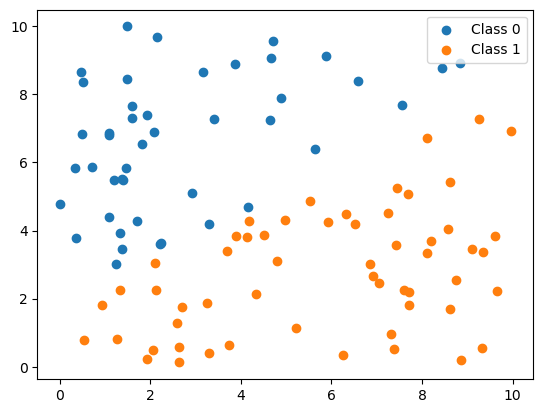

In [3]:
# Generate synthetic data
features, labels = generate_synthetic_data()
# print(features, labels)
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], label='Class 0')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], label='Class 1')
plt.legend()
plt.show()

In [4]:
def perceptron_train(features, labels, learning_rate=0.005, num_epochs=500):
    num_samples, num_features = features.shape
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(num_epochs):
        for i in range(num_samples):
            prediction = np.dot(features[i], weights) + bias
            update = learning_rate * (labels[i] - (prediction > 0).astype(int))
            weights += update * features[i]
            bias += update

    return weights, bias

[ 0.18339933 -0.23767743] 0.3450000000000002


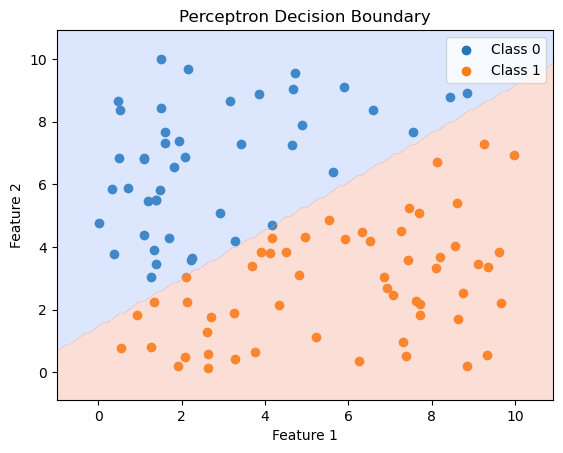

In [5]:
def plot_decision_boundary(features, labels, weights, bias):
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], label='Class 1')

    # Plot the decision boundary
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = (np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias) > 0
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()



# Train perceptron
learned_weights, learned_bias = perceptron_train(features, labels)
print(learned_weights, learned_bias)
# Plot decision boundary
plot_decision_boundary(features, labels, learned_weights, learned_bias)


## Perceptron: Learning by Pseudo-Inverse



In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(num_samples=100, seed=42):
    np.random.seed(seed)
    features = np.random.rand(num_samples, 2) * 10
    weights_true = np.array([2, -3])  # True weights for generating labels
    bias_true = 5
    labels = (np.dot(features, weights_true) + bias_true > 0).astype(int)
    return features, labels

def perceptron_train_pseudo_inverse(features, labels):
    num_samples, num_features = features.shape
    print(features.shape)
    # Add a column of ones to the features for the bias term
    features_with_bias = np.column_stack((np.ones(num_samples), features))
    print(features_with_bias.shape)
    # Calculate the pseudo-inverse of the features matrix
    pseudo_inverse = np.linalg.pinv(features_with_bias)
    print(pseudo_inverse.shape)
    # Calculate weights using the pseudo-inverse
    weights = np.dot(pseudo_inverse, labels)

    return weights[1:], weights[0]  # Extracting weights and bias



In [7]:
# learned_weights, learned_bias = perceptron_train_pseudo_inverse(features, labels)

(100, 2)
(100, 3)
(3, 100)


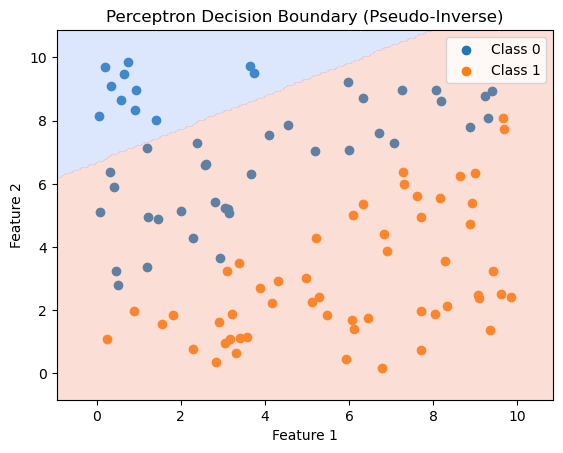

In [8]:

def plot_decision_boundary(features, labels, weights, bias):
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], label='Class 1')

    # Plot the decision boundary
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = (np.dot(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], [bias, weights[0], weights[1]]) > 0)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary (Pseudo-Inverse)')
    plt.legend()
    plt.show()

# Generate synthetic data
features, labels = generate_synthetic_data()

# Train perceptron using Pseudo-Inverse
learned_weights, learned_bias = perceptron_train_pseudo_inverse(features, labels)

# Plot decision boundary
plot_decision_boundary(features, labels, learned_weights, learned_bias)

## Perceptron from sklearn

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
def generate_synthetic_data(num_samples=100, seed=42):
    np.random.seed(seed)
    features = np.random.rand(num_samples, 2) * 10
    weights_true = np.array([2, -3])  # True weights for generating labels
    bias_true = 5
    labels = (np.dot(features, weights_true) + bias_true > 0).astype(int)
    return features, labels

def plot_decision_boundary(features, labels, perceptron_model):
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], label='Class 1')

    # Plot the decision boundary
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = perceptron_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary (sklearn)')
    plt.legend()
    plt.show()

In [11]:
from sklearn.datasets  import load_iris

# Generate synthetic data
iris = load_iris()
features, labels = iris.data, iris.target#generate_synthetic_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, random_state=42)

# Create and train a Perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)



Perceptron()

In [12]:

# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# # Plot decision boundary
# plot_decision_boundary(features, labels, perceptron_model)

Accuracy on the test set: 0.8
